# 1. Dataset Reading using Pandas

- Training data

In [1]:
import pandas as pd

df_train = pd.read_csv('../data/train.csv', encoding='ISO-8859-1')

df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


- Validation data

In [2]:
df_val = pd.read_csv('../data/test.csv', encoding='ISO-8859-1')

df_val.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


### Concatenate Dataset

In [3]:
df = pd.concat([df_train, df_val])

df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


# 2. Data preprocessing

- Training Data Distributions

<Axes: xlabel='sentiment', ylabel='text'>

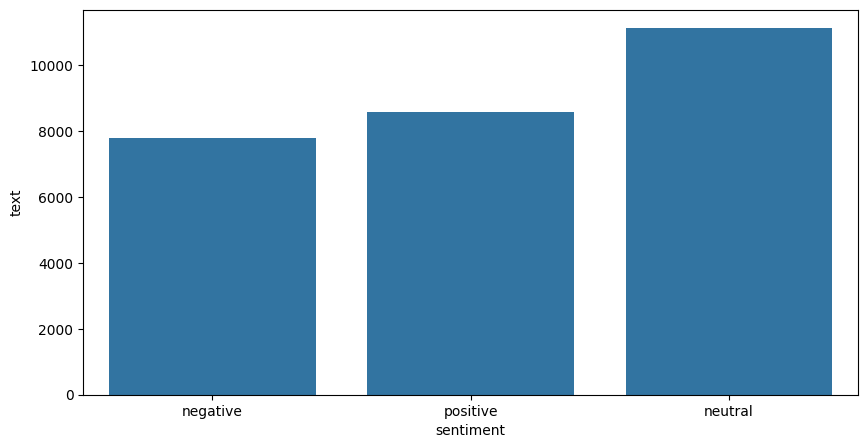

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df_train.replace("", np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)
data = df_train.groupby('sentiment')['text'].count().sort_values().reset_index()
plt.figure(figsize = (10,5))
sns.barplot(data=data,x='sentiment',y='text')

- Validation Data Distributions

<Axes: xlabel='sentiment', ylabel='text'>

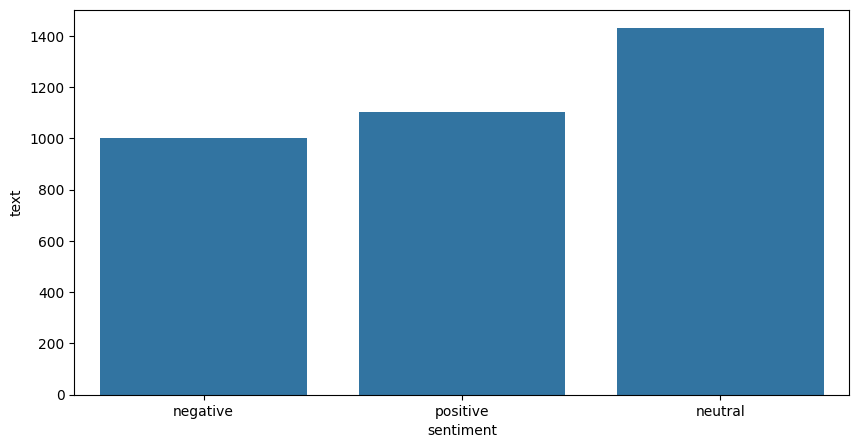

In [5]:
df_val.replace("", np.nan, inplace=True)
df_val.dropna(inplace=True)
df_val.reset_index(drop=True, inplace=True)
data = df_val.groupby('sentiment')['text'].count().sort_values().reset_index()
plt.figure(figsize = (10,5))
sns.barplot(data=data,x='sentiment',y='text')

- Dropping unnecessary columns in both df (concatenated dataset)

In [6]:
df.drop(['textID', 
               'Time of Tweet', 
               'Age of User', 
               'Country', 
               'Population -2020', 
               'Land Area (Km²)', 
               'Density (P/Km²)'], axis=1, inplace=True)

df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


- Removing NaN Rows

In [7]:
df = df.dropna()

df.tail()

,text,selected_text,sentiment
27476,wish we could come see u on Denver husband l...,d lost,negative
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,But it was worth it ****.,But it was worth it ****.,positive
27480,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


- Regex to remove unneeded symbol, punctuation, etc.

In [8]:
import re
from string import punctuation

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[\]]*', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    text = re.sub(r'[%s]' % re.escape(punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['text'] = df['text'].apply(preprocess_text)
df.head()

,text,selected_text,sentiment
0,id have responded if i were going,"I`d have responded, if I were going",neutral
1,sooo sad i will miss you here in san diego,Sooo SAD,negative
2,my boss is bullying me,bullying me,negative
3,what interview leave me alone,leave me alone,negative
4,sons of why couldnt they put them on the relea...,"Sons of ****,",negative


- Data Normalization

In [9]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text

df['text'] = df['text'].apply(normalize_text)
df.head()

,text,selected_text,sentiment
0,id have responded if i were going,"I`d have responded, if I were going",neutral
1,sooo sad i will miss you here in san diego,Sooo SAD,negative
2,my boss is bullying me,bullying me,negative
3,what interview leave me alone,leave me alone,negative
4,sons of why couldnt they put them on the relea...,"Sons of ****,",negative


- Tokenization

In [10]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenization: {e}")
        return []
    
df['text'] = df['text'].apply(tokenize_text)
df.head()

,text,selected_text,sentiment
0,"[id, have, responded, if, i, were, going]","I`d have responded, if I were going",neutral
1,"[sooo, sad, i, will, miss, you, here, in, san,...",Sooo SAD,negative
2,"[my, boss, is, bullying, me]",bullying me,negative
3,"[what, interview, leave, me, alone]",leave me alone,negative
4,"[sons, of, why, couldnt, they, put, them, on, ...","Sons of ****,",negative


- Using stopwords to remove unneeded words

In [11]:
# import nltk
# nltk.download('stopwords') # run this on a new devices
from nltk.corpus import stopwords

eng_stopwords = stopwords.words('english')

def remove_stopwords(tokens: list):
    filtered_tokens = [token for token in tokens if token.lower() not in eng_stopwords]
    return ' '.join(filtered_tokens)

df['text'] = df['text'].apply(remove_stopwords)
df.head()

,text,selected_text,sentiment
0,id responded going,"I`d have responded, if I were going",neutral
1,sooo sad miss san diego,Sooo SAD,negative
2,boss bullying,bullying me,negative
3,interview leave alone,leave me alone,negative
4,sons couldnt put releases already bought,"Sons of ****,",negative


- Shape checking

In [12]:
df.shape

(27480, 3)

- counting values

In [13]:
df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

# 3. Encode the data (statements & labels)

- statements encoding

  1. Create a tokenizer: `tf.keras.preprocessing.text.Tokenizer(...)`

    - Takes only 10000 words that will be kept onto the vocabulary.
    - oov_token: "out of vocabulary" -> use to represent any word that is not part of tokenizer's vocabulary.
  2. Apply the sentences: `tokenizer.fit_on_texts(...)`
    - `fit_on_texts()`: **Counts word frequencies** in the given text and **creates an index** where each word is *assigned* an integer.
  3. Convert each sentence into a sequence of integers: `texts_to_sequences(...)`
      - Words that **are not in the top 10000** most frequent words are replaced by the index for the `<OOV>` token.

In [14]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')

tokenizer.fit_on_texts(df['text'])

train_sequences = tokenizer.texts_to_sequences(df['text'])

- Getting max length of a token for padded sequences making

In [15]:
max_sequence_length = max(len(token) for token in train_sequences)

max_sequence_length

23

- Changing `train_sequences` into padded sequences

  Why do we need to pads the sequences?

  - Pads the sequences of integers is to ensure they all have the same length: `tf.keras.preprocessing.sequence.pad_sequences(...)`
  - `maxlen=100`: Specifies that each sequence will have a maximum length of 100. **If a sequence is shorter than 100 words, it will be padded with zeros to make its length 100.**
  - `padding='post'`: Specifies that the padding (zeros) **will be added to the end** of each sequence (after the text).

In [16]:
train_pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, 
                                                                    maxlen=max_sequence_length, 
                                                                    padding='post', 
                                                                    truncating='post')

train_pad_sequences.shape

(27480, 23)

- One Hot Encoding

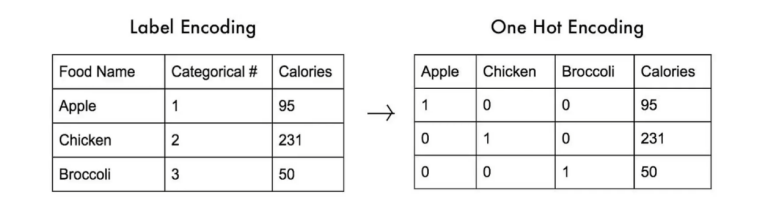

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_label_arrays = encoder.fit_transform(df['sentiment'])

# One-Hot Encoding
train_label_arrays = tf.keras.utils.to_categorical(train_label_arrays)

train_label_arrays

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

- Variable names changing 
    - for better readibility (since we don't use train_test_split() for this dataset)

In [18]:
X_train = train_pad_sequences
y_train = train_label_arrays

- Data Splitting (80:10:10)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 4. Machine Learning Model (Logistic Regression)

The hypothesis for Logistic Regression is defined as:

$$
h_\theta(x) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

where \( z \) is the linear combination of the input features:

$$
z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \theta^\top x
$$

The cost function for Logistic Regression is given by:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

The gradient descent update rule is:

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)
$$

With Conditions:

$$for \ j = 0, 1, \dots, n \$$


- Create a new X, y data for TF-IDF pre-processing

In [25]:
XV_train = df['selected_text'].apply(preprocess_text)
YV_train = df['sentiment'].astype('category').cat.codes

- Data Splitting

In [26]:
XV_train, XV_test, YV_train, YV_test = train_test_split(XV_train, YV_train, test_size=0.2, random_state=42)

- Preprocessing using TF-IDF

Logistic Regression only accepts 1D array

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(XV_train)
XV_test = vectorization.transform(XV_test)

- Model Training

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=1)

# Fit the model
model.fit(XV_train, YV_train)

LogisticRegression(n_jobs=1)

- Model Evaluation

In [32]:
accuracy = model.score(XV_test, YV_test)
print(f"Test Accuracy with Logistic Regression: {accuracy}")

Test Accuracy with Logistic Regression: 0.8289665211062591


- Classification Report

In [33]:
from sklearn.metrics import classification_report

y_pred = model.predict(XV_test)
print(classification_report(YV_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1572
           1       0.79      0.88      0.83      2236
           2       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.83      0.83      0.83      5496



- User Testing

In [34]:
test_texts = [
    "I absolutely love this product! It's fantastic.", # positive
    "Do not know about what happened there", # neutral
    "I hate this product. It's terrible.", # negative
    "Hate my boss, he is a terrible person", # negative
    "My boss is a great person", # positive
    "I have to bark like a dog to get a raise", # negative
    "I'm so depressed", # negative
    "I'm so happy" # positive
]

def predict_sentiment(texts: list):
    texts = [preprocess_text(text) for text in texts]
    texts = vectorization.transform(texts)
    return model.predict(texts)

predict_sentiment(test_texts)

array([2, 1, 0, 0, 2, 1, 0, 2], dtype=int8)

- Save Model

In [35]:
import pickle

with open('../model/LogisticRegression.pkl', 'wb') as f:
    pickle.dump(model, f)

# 5. Deep Learning Model (RNN)

RNN:
- Embedding layer (Acts as **input layer**) --> Changing word into a vector representation of word based on its context in that sentences.
- Convolutional Layer --> For text classification
- LSTM Layer (Long-Short-Term-Memory) --> For memorizing text contexts
- Dense Layer (ReLu Activation function)
- Output Layer (Softmax Activation function)

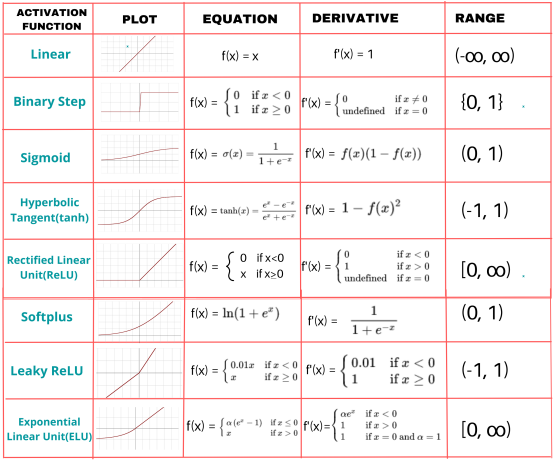

  - Softmax function

  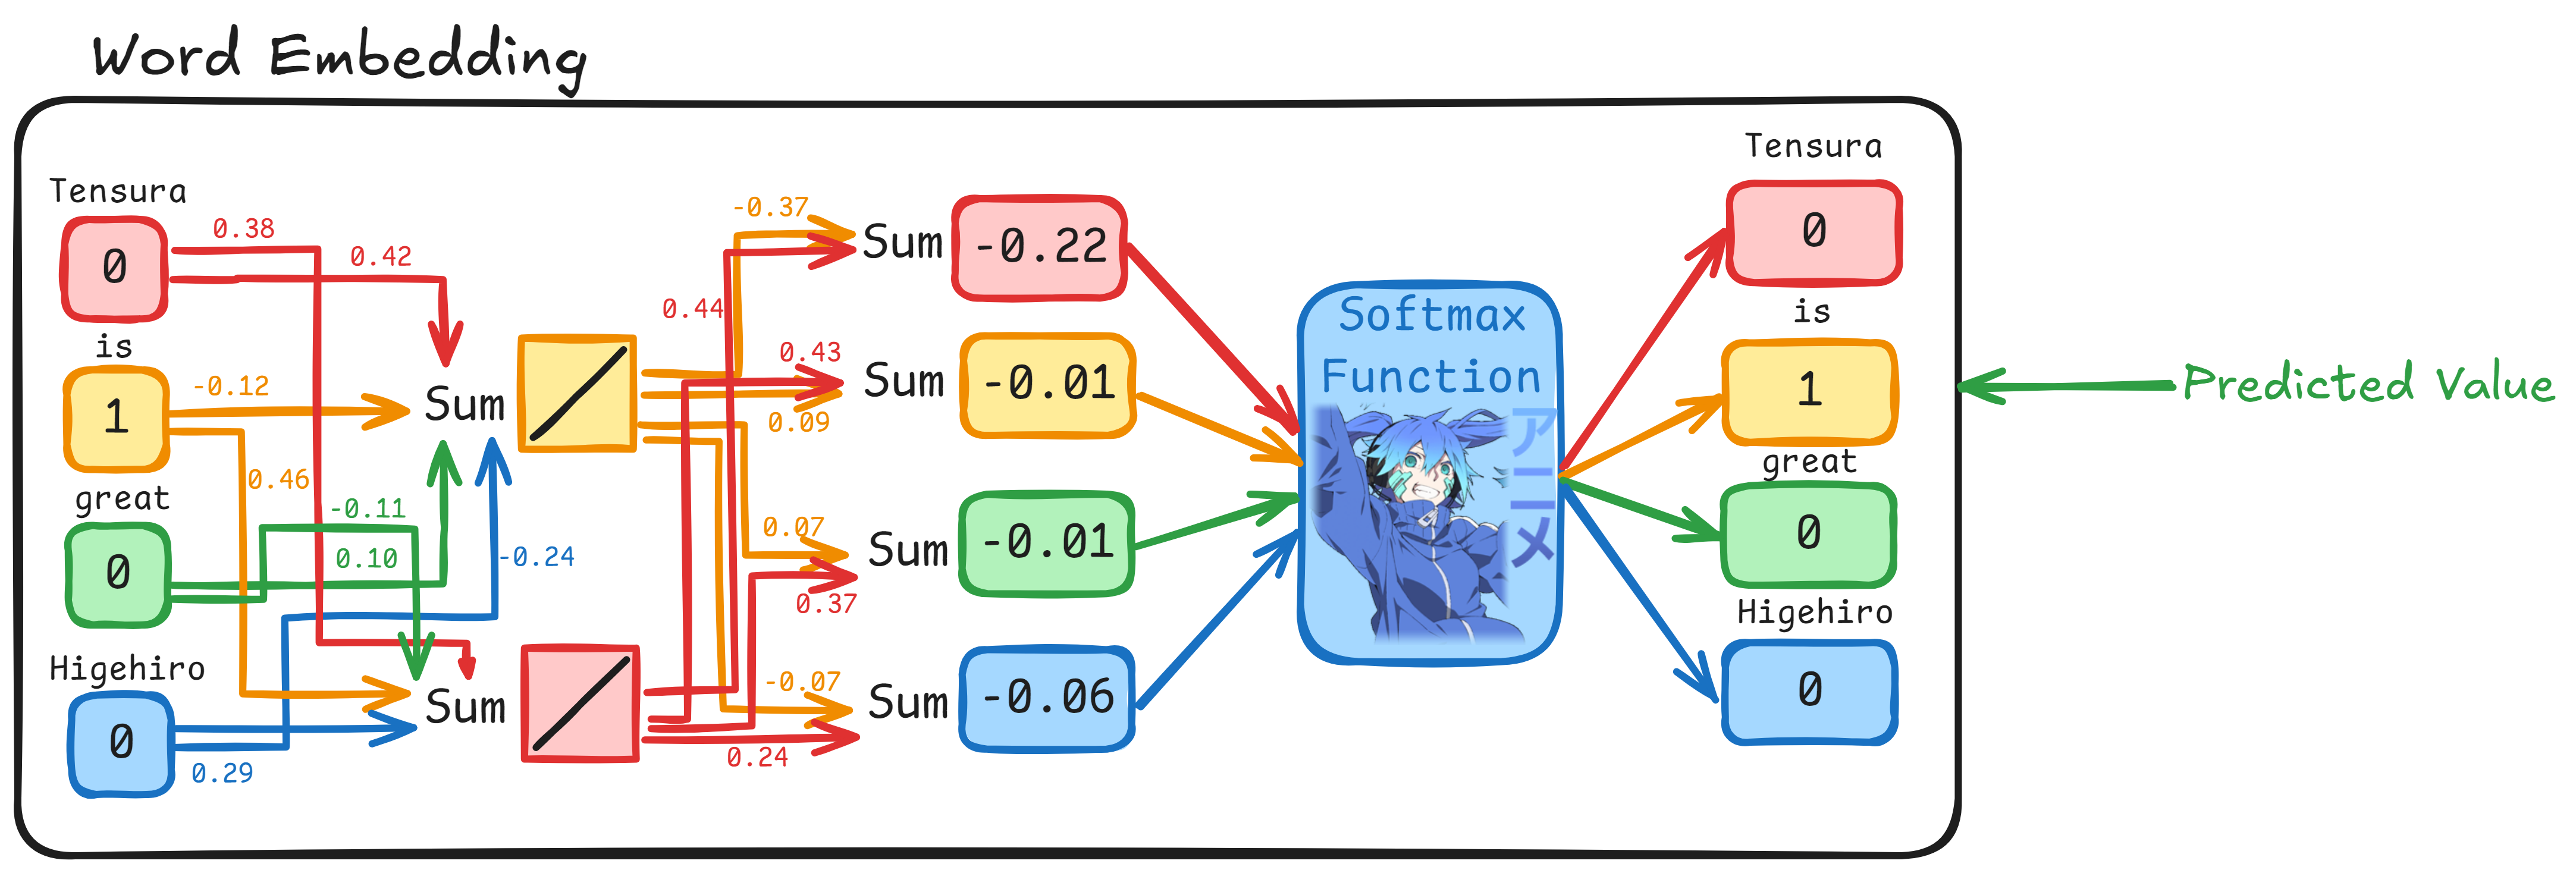

- Getting input_size for embedding layer input dimensions

In [19]:
input_size = np.max([np.max(train_pad_sequences), np.max(val_pad_sequences)]) + 1
input_size

1000

### Hyperparameter

In [20]:
# hyperparameters

embedding_dim = 256
batch_size = 64
epochs = 20

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = tf.keras.losses.CategoricalCrossentropy()

- Creating the Neural Network Model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=input_size, output_dim=embedding_dim),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

- Compile the model using:

    - Adam for learning-rate optimizer
    - Categorical Crossentropy for loss calculations

In [22]:
model.compile(  optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'],
                run_eagerly=True)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

- Combatting overfitting

    - Early Stopping

    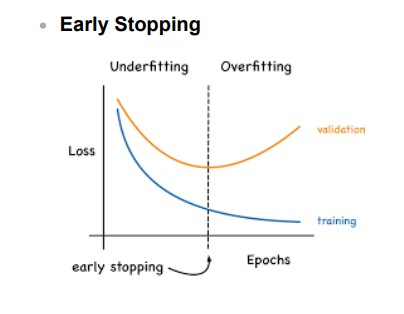

    - Learning Rate Scheduler

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(  monitor='val_loss',
                                                    patience=3,
                                                    restore_best_weights=True)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(    monitor='val_loss',
                                                        factor=0.5,
                                                        patience=2,
                                                        min_lr=1e-6)

- Model Training

In [24]:
history = model.fit(dataset,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(val_dataset),
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 675s 803ms/step - accuracy: 0.4277 - loss: 1.8441 - val_accuracy: 0.6601 - val_loss: 1.3430 - learning_rate: 1.0000e-04
Epoch 2/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 658s 784ms/step - accuracy: 0.6414 - loss: 1.3153 - val_accuracy: 0.6544 - val_loss: 1.1435 - learning_rate: 1.0000e-04
Epoch 3/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 653s 778ms/step - accuracy: 0.6736 - loss: 1.0985 - val_accuracy: 0.6932 - val_loss: 0.9668 - learning_rate: 1.0000e-04
Epoch 4/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 743s 886ms/step - accuracy: 0.6848 - loss: 0.9731 - val_accuracy: 0.6738 - val_loss: 0.9476 - learning_rate: 1.0000e-04
Epoch 5/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 681s 812ms/step - accuracy: 0.6945 - loss: 0.8930 - val_accuracy: 0.6872 - val_loss: 0.8389 - learning_rate: 1.0000e-04
Epoch 6/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 667s 795ms/step - accuracy: 0.6925 - loss: 0.8440 - val_accuracy: 0.6947 - val_loss: 0.7958 - learning_rate: 1.0000e-04
Epoch 7/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 

- Model Evaluation

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy with Neural Network: {accuracy}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 34s 306ms/step - accuracy: 0.7039 - loss: 0.7316
Test Accuracy with Neural Network: 0.7037988901138306


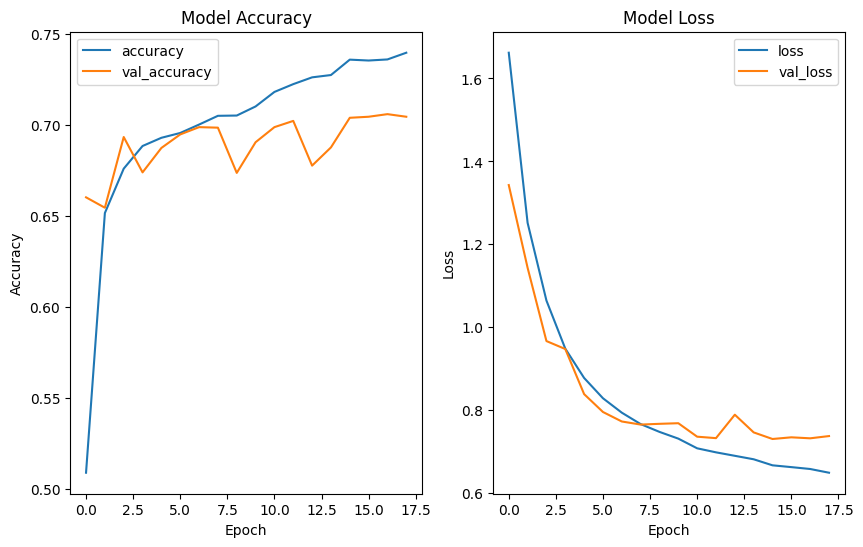

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

- Confusion Matrix

110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 282ms/step
Accuracy Score is : 0.7037989145958298
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.58      0.66       996
           1       0.63      0.77      0.70      1414
           2       0.78      0.73      0.75      1091

    accuracy                           0.70      3501
   macro avg       0.72      0.69      0.70      3501
weighted avg       0.72      0.70      0.70      3501

Confusion Matrix


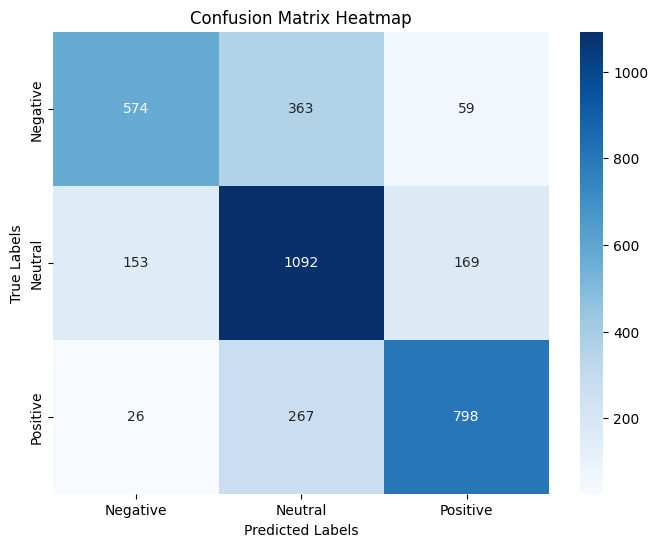

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_eval(model):
    y_pred_prob = model.predict(X_test)
    y_pred = y_pred_prob.argmax(axis=1)
    y_test_labels = y_test.argmax(axis=1)
    print(f'Accuracy Score is : {accuracy_score(y_test_labels, y_pred)}')
    print('Classification Report')
    print(classification_report(y_test_labels, y_pred))
    print('Confusion Matrix')
    cm = confusion_matrix(y_test_labels, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

model_eval(model)

- Model Testing

In [34]:
def predict_class(text: str):
    text = preprocess_text(text)
    text = remove_stopwords(text)
    text = tokenizer.texts_to_sequences([text])
    text = tf.keras.preprocessing.sequence.pad_sequences(text, maxlen=max_sequence_length, padding='post', truncating='post')
    prediction = model.predict(text)
    prediction = prediction.argmax(axis=1)
    return encoder.inverse_transform(prediction)[0]

In [35]:
test_texts = [
    "I absolutely love this product! It's fantastic.", # positive
    "Do not know about what happened there", # neutral
    "I hate this product. It's terrible.", # negative
    "Hate my boss, he is a terrible person", # negative
    "My boss is a great person", # positive
    "I have to bark like a dog to get a raise", # negative
    "I'm so depressed", # negative
    "I'm so happy" # positive
]

for text in test_texts:
    print(f"{text} -> {predict_class(text)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
I absolutely love this product! It's fantastic. -> positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
Do not know about what happened there -> neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
I hate this product. It's terrible. -> negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
Hate my boss, he is a terrible person -> negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
My boss is a great person -> positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
I have to bark like a dog to get a raise -> neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
I'm so depressed -> neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
I'm so happy -> positive


- Model save

In [36]:
model.save('../model/model.h5')
model.save('../model/keras/model.keras')

# Load the model
model = tf.keras.models.load_model('../model/model.h5')